## 1

In [2]:
p3 = 4
t3 = 400
x4 = 1
p4 = 0.4
x6 = 1
p5 = p4
t5 = t3
p6 = 0.01

In [3]:
!pip install pyromat --break-system-packages

In [4]:
import pyromat as pm

In [5]:
pm.config['unit_pressure'] = 'MPa'
pm.config['unit_temperature'] = 'C'

In [6]:
pm.search(name="steam")

{<ig2, ig.H2O>, <mp1, mp.H2O>}

In [7]:
steam = pm.get('mp.H2O')

In [8]:
help(steam.s)

Help on method s:

s(*varg, quality=False, **kwarg) method of builtins.mp1 instance
    Entropy
        s(...)

    All properties accept two other properties as flexible inputs.
    Below are the recognized keywords, their meaning, and the config entries
    that determine their units.
        T   temperature         unit_temperature
        p   pressure            unit_pressure
        d   density             unit_matter / unit_volume
        v   specific volume     unit_volume / unit_matter
        x   quality             dimensionless
        e   internal energy     unit_energy / unit_matter
        h   enthalpy            unit_energy / unit_matter
        s   entropy             unit_energy / unit_matter / unit_temperature

    If no keywords are specified, the positional arguments are interpreted
    as (T,p).  To configure their defaults, use the def_T and def_p config
    entries.

    Additionally, if the optional keyword, "quality" is set to True, the
    quality of the liqui

In [9]:
h3 = steam.h(p=p3,T=t3)[0]
s3 = steam.s(p=p3,T=t3)[0]

In [10]:
s4 = s3 #isentropic expansion

In [11]:
t4 = steam.T_s(s=s4, p=p4)[0]
h4 = steam.h(p=p4, T=t4)[0]

In [12]:
h5 = steam.h(p=p5,T=t5)[0]
s5 = steam.s(p=p5,T=t5)[0]

In [13]:
s6=s5

In [14]:
T6 = steam.T_s(s=s6, p=p6)[0]
h6 = steam.h(p=p6, T=T6)[0]

In [15]:
work_turbine_hp = h3 - h4       # Work done by high-pressure turbine
work_turbine_lp = h5 - h6       # Work done by low-pressure turbine

In [16]:
t1=T6
x1=0
h1 = steam.h(x=x1,T=t1)[0]
s1 = steam.s(x=x1,T=t1)[0]
p2 = p3
s2 = s1
t2 = steam.T_s(s=s2,p=p2)[0]
h2 = steam.h(T=t2,p=p2)[0]

In [17]:
work_pump = h2-h1
net_work = work_turbine_hp + work_turbine_lp - work_pump
heat_boiler = h3- h2

In [18]:
heat_boiler

3018.6735274780704

In [19]:
reheat = h5 - h4
total_heat_added = heat_boiler + reheat

In [20]:
thermal_efficiency = (net_work / total_heat_added) * 100
thermal_efficiency

32.70314596249612

## 3

In [5]:
import pyromat as pm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


pm.config['unit_pressure'] = 'MPa'
pm.config['unit_temperature'] = 'K'
pm.config['unit_energy'] = 'kJ'
pm.config['unit_matter'] = 'kg'

h2o = pm.get('mp.H2O')
r134a = pm.get('mp.C2H2F4')

In [4]:
pm.search(name='R-134a')

{<mp1, mp.C2H2F4>}

In [16]:
def get_saturation_properties(fluid, T_range):
        p_sat = fluid.ps(T_range)
        v_f = fluid.v(T_range, p_sat, x=0)  # Saturated liquid specific volume
        v_g = fluid.v(T_range, p_sat, x=1)  # Saturated vapor specific volume
        h_f = fluid.h(T_range, p_sat, x=0)  # Saturated liquid enthalpy
        h_g = fluid.h(T_range, p_sat, x=1)  # Saturated vapor enthalpy
        s_f = fluid.s(T_range, p_sat, x=0)  # Saturated liquid entropy
        s_g = fluid.s(T_range, p_sat, x=1)  # Saturated vapor entropy
        return p_sat, v_f, v_g, h_f, h_g, s_f, s_g

In [17]:
def plot_diagrams(fluid_name):
    """Plot PV, TS, and Ph diagrams for the selected fluid"""
    # Clear previous output
    clear_output(wait=True)
    
    # Select fluid
    if fluid_name == 'H2O':
        fluid = h2o
        T_min, T_max = 273.16, 647  # K
    elif fluid_name == 'R22':
        fluid = r22
        T_min, T_max = 115, 369  # K
    elif fluid_name == 'R134a':
        fluid = r134a
        T_min, T_max = 170, 374  # K
        
    T_range = np.linspace(T_min, T_max, 200)
    
    # Get saturation properties
    props = get_saturation_properties(fluid, T_range)
    if props is None:
        return
        
    p_sat, v_f, v_g, h_f, h_g, s_f, s_g = props
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # PV diagram
    ax1.plot(v_f, p_sat, 'b-', label='Saturated liquid')
    ax1.plot(v_g, p_sat, 'r-', label='Saturated vapor')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Specific Volume (m³/kg)')
    ax1.set_ylabel('Pressure (MPa)')
    ax1.set_title(f'P-v Diagram - {fluid_name}')
    ax1.grid(True)
    ax1.legend()
    
    # TS diagram
    ax2.plot(s_f, T_range, 'b-', label='Saturated liquid')
    ax2.plot(s_g, T_range, 'r-', label='Saturated vapor')
    ax2.set_xlabel('Specific Entropy (kJ/kg·K)')
    ax2.set_ylabel('Temperature (K)')
    ax2.set_title(f'T-s Diagram - {fluid_name}')
    ax2.grid(True)
    ax2.legend()
    
    # Ph diagram
    ax3.plot(h_f, p_sat, 'b-', label='Saturated liquid')
    ax3.plot(h_g, p_sat, 'r-', label='Saturated vapor')
    ax3.set_yscale('log')
    ax3.set_xlabel('Specific Enthalpy (kJ/kg)')
    ax3.set_ylabel('Pressure (MPa)')
    ax3.set_title(f'P-h Diagram - {fluid_name}')
    ax3.grid(True)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in the ar2 term. This causes singularities in
PM WARN: derivatives very close to the critical point.
PM WARN: _ar():: b<1 in 

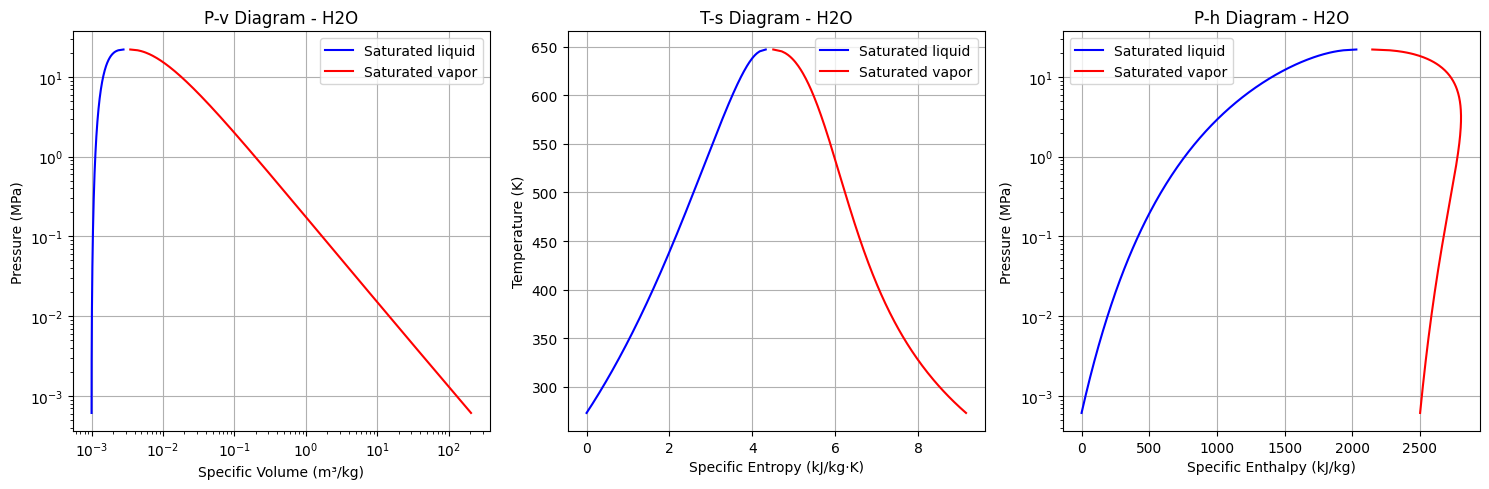

interactive(children=(Dropdown(description='Fluid:', options=('H2O', 'R22', 'R134a'), value='H2O'), Output()),…

In [18]:
fluid_dropdown = widgets.Dropdown(
    options=['H2O', 'R22', 'R134a'],
    value='H2O',
    description='Fluid:',
)

# Display interactive widgets
display(fluid_dropdown)

# Connect the dropdown to the plotting function
w = widgets.interactive(plot_diagrams, fluid_name=fluid_dropdown)
w

## 4

In [19]:
!pip install CoolProp --break-system-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [45]:
from CoolProp.CoolProp import PropsSI

fluid = 'H2O'
pressure = 10000

temperature = np.arange(20)
temperature = [t+273.16 for t in temperature]

In [46]:
density = [PropsSI('D','T',t,'P',pressure,fluid) for  t in temperature]

Text(0, 0.5, 'density')

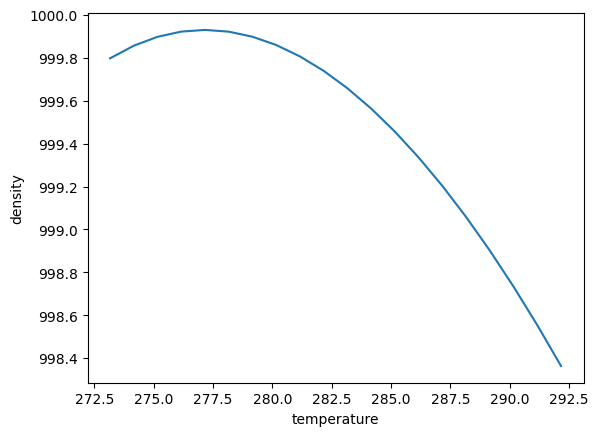

In [48]:
plt.plot(temperature,density)
plt.xlabel("temperature")
plt.ylabel("density")

## 5

In [51]:
import CoolProp.CoolProp as CP
import CoolProp.HumidAirProp as HA

vol = 100
pressure = 0.1*1e6
temperature = 273.16 + 35
relative_humidity = 0.7

In [52]:
R_dry_air = CP.PropsSI('GAS_CONSTANT', 'air')

humidity_ratio = HA.HAPropsSI('W', 'T', temperature, 'P', pressure, 'RH', relative_humidity)
dew_point = HA.HAPropsSI('D', 'T', temperature, 'P', pressure, 'RH', relative_humidity) - 273.16  # in °C
enthalpy_per_dry_air = HA.HAPropsSI('Hda', 'T', temperature, 'P', pressure, 'RH', relative_humidity)
enthalpy_per_moist_air = HA.HAPropsSI('H', 'T', temperature, 'P', pressure, 'RH', relative_humidity)
entropy_per_dry_air = HA.HAPropsSI('Sda', 'T', temperature, 'P', pressure, 'RH', relative_humidity)
entropy_per_moist_air = HA.HAPropsSI('S', 'T', temperature, 'P', pressure, 'RH', relative_humidity)

In [55]:
mass_of_dry_air = pressure * vol / (R_dry_air * temperature)
mass_of_vapor = mass_of_dry_air * humidity_ratio

In [56]:
viscosity = HA.HAPropsSI('V', 'T', temperature, 'P', pressure, 'RH', relative_humidity)

wet_bulb_temperature = HA.HAPropsSI('Twb', 'T', temperature, 'P', pressure, 'RH', relative_humidity) - 273.16

In [57]:

# Display results
print(f"Enthalpy per unit dry air: {enthalpy_per_dry_air} J/kg")
print(f"Enthalpy per unit moist air: {enthalpy_per_moist_air} J/kg")
print(f"Entropy per unit dry air: {entropy_per_dry_air} J/(kg·K)")
print(f"Entropy per unit moist air: {entropy_per_moist_air} J/(kg·K)")
print(f"Humidity ratio: {humidity_ratio} kg_water/kg_dry_air")
print(f"Dew point temperature: {dew_point} °C")
print(f"Mass of dry air: {mass_of_dry_air} kg")
print(f"Mass of vapor: {mass_of_vapor} kg")
print(f"Viscosity (μ): {viscosity} Pa.s")
print(f"Wet bulb temperature: {wet_bulb_temperature} °C")

Enthalpy per unit dry air: 100995.31455957671 J/kg
Enthalpy per unit moist air: 100995.31455957671 J/kg
Entropy per unit dry air: 355.14957950223084 J/(kg·K)
Entropy per unit moist air: 355.14957950223084 J/(kg·K)
Humidity ratio: 0.025646377717531615 kg_water/kg_dry_air
Dew point temperature: 28.70411092227272 °C
Mass of dry air: 3902.896860312809 kg
Mass of vapor: 100.09516707215053 kg
Viscosity (μ): 0.9206859325423088 Pa.s
Wet bulb temperature: 30.04450155000069 °C


In [ ]:
1 kg/s of saturated moist air (RH = 100%) at 100 kPa and 10 °C goes through a heat exchanger and
comes out at 25 °C. What is the exit RH and how much power is needed. humidity_ratio_inlet = HA.HAPropsSI('W', 'T', inlet_temperature, 'P', pressure, 'RH', relative_humidity_inlet)


## 6

In [69]:
m_dot = 1
relative_inlet_humidity = 1
pressure = 100*1e3
t1 = 273.16+10
t2 = 273.16+25

In [70]:
## Assumption = pressure remains constant.

In [71]:
humidity_ratio_inlet = HA.HAPropsSI('W', 'T', t1, 'P', pressure, 'RH', relative_inlet_humidity)

In [72]:
enthalpy_inlet = HA.HAPropsSI('H', 'T', t1, 'P', pressure, 'RH', relative_inlet_humidity)
enthalpy_outlet = HA.HAPropsSI('H', 'T', t2, 'P', pressure, 'W', humidity_ratio_inlet)

power_required = m_dot * (enthalpy_outlet - enthalpy_inlet)  # in watts (J/s)

relative_humidity_outlet = HA.HAPropsSI('RH', 'T', t2, 'P', pressure, 'W', humidity_ratio_inlet)

print(f"Humidity Ratio (inlet and outlet): {humidity_ratio_inlet} kg_water/kg_dry_air")
print(f"Enthalpy at inlet: {enthalpy_inlet} J/kg")
print(f"Enthalpy at outlet: {enthalpy_outlet} J/kg")
print(f"Power required for heating: {power_required} W")
print(f"Relative Humidity at outlet: {relative_humidity_outlet * 100:.2f} %")

Humidity Ratio (inlet and outlet): 0.00777037870621776 kg_water/kg_dry_air
Enthalpy at inlet: 29639.483001411074 J/kg
Enthalpy at outlet: 44949.544198344534 J/kg
Power required for heating: 15310.06119693346 W
Relative Humidity at outlet: 38.74 %


## 7

In [83]:
v_dot = 1
pressure = 100*1e3
t1 = 273.16+25
t2 = 273.16+15
inlet_rh = 0.8

In [84]:
humidity_inlet = HA.HAPropsSI('W', 'T', t1, 'P', pressure, 'RH', inlet_rh)
humidity_outlet = HA.HAPropsSI('W', 'T', t2, 'P', pressure, 'RH', 1.0)

enthalpy_inlet = HA.HAPropsSI('H', 'T', t1, 'P', pressure, 'RH', humidity_inlet)

In [85]:
# Air density at inlet conditions
density_inlet = HA.HAPropsSI('D', 'T', t1, 'P', pressure, 'RH', inlet_rh)

# Mass flow rate of dry air
mass_flow_rate_dry_air = v_dot * density_inlet  # kg/s

In [86]:
condensed_water_per_sec = mass_flow_rate_dry_air * (humidity_inlet - humidity_outlet)

# Convert to kg/hour
condensed_water_per_hour = condensed_water_per_sec * 3600 

In [87]:
condensed_water_per_sec

1.595283517193772